# EDA

In [123]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [124]:
# reading dataset and printing data
stock = pd.read_excel("Stock_Price_data_set.xlsx")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [125]:
# printing last 5 rows of dataset
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400.0


In [126]:
# getting dimensions of dataset
stock.shape

(1009, 7)

In [127]:
# getting additional information of dataset
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [128]:
# getting statistical information of dataset
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [129]:
# checking for missing values
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [130]:
# checking for duplicate values
stock.duplicated().sum()

0

In [131]:
# dropping unncessary column
stock.drop(['Date','Adj Close'], axis = 1, inplace = True)

In [132]:
stock.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100.0
1,247.699997,266.700012,245.000000,265.720001,12595800.0
2,266.579987,272.450012,264.329987,264.559998,8981500.0
3,267.079987,267.619995,250.000000,250.100006,9306700.0
4,253.850006,255.800003,236.110001,249.470001,16906900.0


In [133]:
# checking for correlation among different features
stock.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000


# Data Visualization

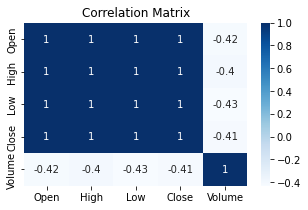

In [134]:
# plotting graph for correlation
plt.figure(figsize=(5,3))
sns.heatmap(stock.corr(), annot = True, cmap = plt.cm.Blues)
plt.title("Correlation Matrix")
plt.show()

It is observed that most of the features are positively correlated to each other.

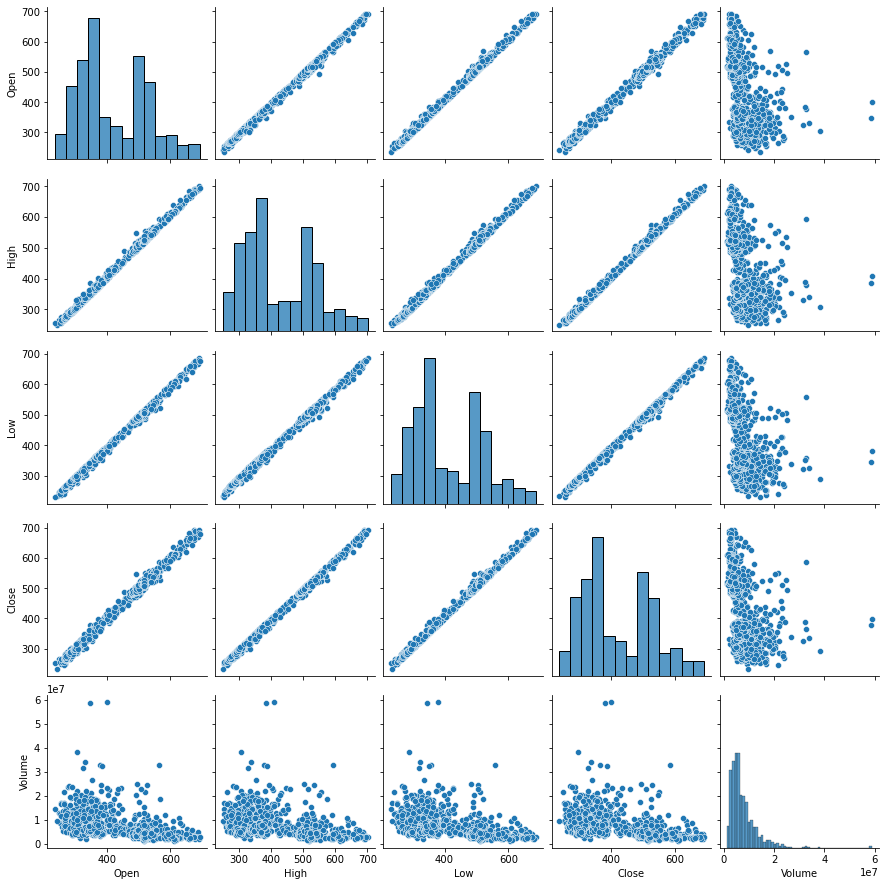

In [135]:
# creating pair plot
sns.pairplot(stock)

<AxesSubplot:>

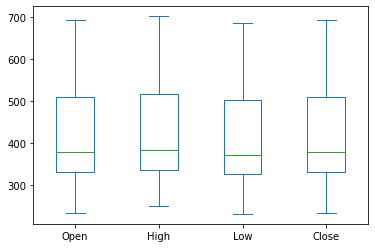

In [136]:
# creating box plot for different features
stock[['Open','High','Low','Close']].plot(kind = 'box')

<AxesSubplot:>

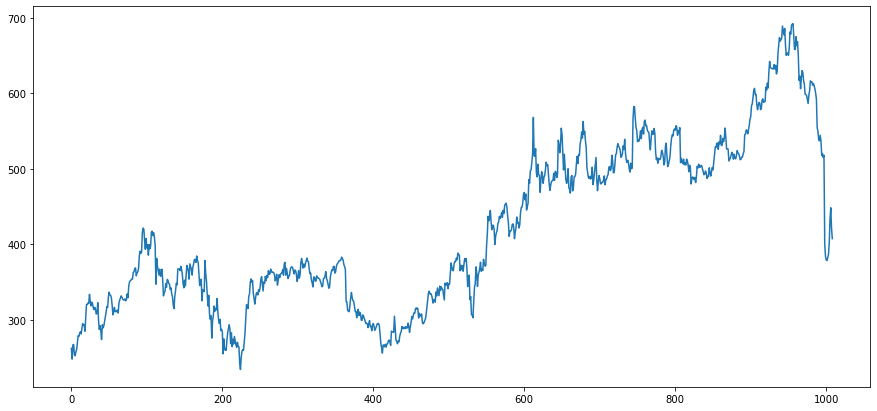

In [137]:
# Visualizing data for 'Open' feature
stock['Open'].plot(figsize =(15,7))

<AxesSubplot:>

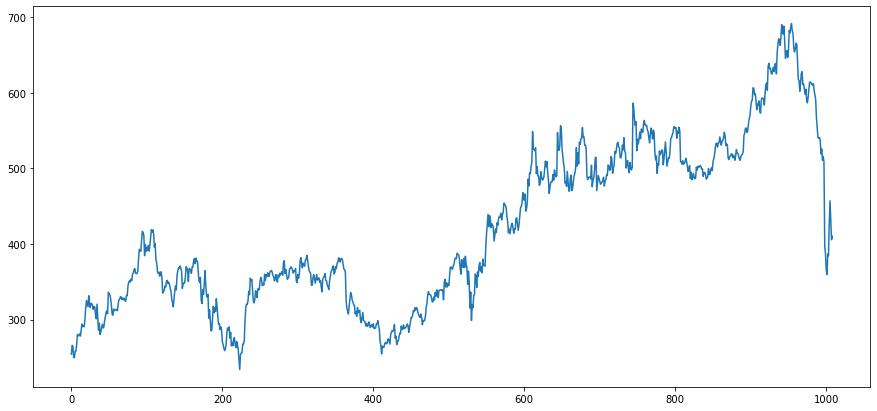

In [138]:
# Visualizing data for 'Close' feature
stock['Close'].plot(figsize =(15,7))

# Splitting of Features

In [139]:
# splitting independent and target variables
x = stock.drop(['Close'], axis=1) 
y = stock['Close']
print(x.shape)

(1009, 4)


In [140]:
# splitting dataset into training data and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=50)

# Linear Regression

In [141]:
# Applying linear regression algorithm for prediction
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
lr_pred

array([273.39026953, 488.2279506 , 592.93751188, 299.08017617,
       519.47935456, 636.33583765, 366.18751495, 284.66342387,
       494.54089913, 501.90683974, 543.42631351, 503.84613794,
       359.19706795, 330.04574767, 517.16231559, 514.80566342,
       351.74549927, 288.0308123 , 353.90133286, 493.06801665,
       407.42680985, 503.0555909 , 375.62120823, 292.51364875,
       538.35334813, 346.33349507, 489.00953174, 470.27100717,
       334.47995142, 544.87801039, 434.39775855, 294.96141746,
       284.07786645, 555.35731986, 358.35289183, 628.74822957,
       415.36804072, 504.35877129, 498.60184629, 378.18962757,
       357.65621105, 309.60759584, 311.83102507, 324.59048542,
       316.27981243, 525.30122679, 440.25604214, 340.78764648,
       332.35558501, 349.32936377, 380.90944272, 310.41047158,
       379.65721646, 627.73481846, 493.54681588, 311.31431027,
       362.37786973, 379.53928681, 483.894223  , 550.35111341,
       481.54707339, 329.0316461 , 338.37237681, 433.65

In [142]:
df = pd.DataFrame({'Actual Stock': ytest,'Predicted Stock': lr_pred})
df.head()

,Actual Stock,Predicted Stock
421,270.720001,273.390270
692,487.220001,488.227951
973,605.039978,592.937512
394,296.779999,299.080176
721,519.780029,519.479355


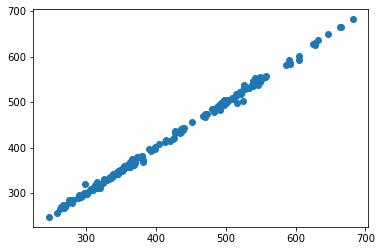

In [143]:
# creating scatter plot between test data and predicted data
plt.scatter(ytest,lr_pred)

In [144]:
graph = df.head(25)

<AxesSubplot:>

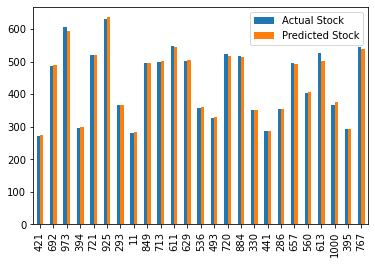

In [145]:
graph.plot(kind='bar')

# Model Performance

In [146]:
# accuracy score on testing data
score = lr.score(xtest,ytest)
print(score*100)

# evaluating model performance
MSE = mean_squared_error(ytest, lr_pred) 
print("MSE:",MSE)

MAE = mean_absolute_error(ytest, lr_pred) 
print("MAE:",MAE)

99.80215034227895
MSE: 21.122027916415057
MAE: 3.2207411232826577


In [147]:
# calculating R2 score
R_Score = r2_score(ytest, lr_pred) 
print("R_Score:",R_Score)

R_Score: 0.9980215034227895


It is observed that the model is giving 99.80% accuracy with Mean Square Error of 21.1, Mean Absolute Error of 3.2 and R2 score of 0.998